In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.signal import find_peaks
import os
from scipy import interpolate
SaveFig = './Plots/'

.\Data8_16\step2_1V5050\
.\Data8_16\step2_1V5050\FFT2.dat
1.6097680228180868
7.711113843371e-12


C:\Users\repag\Anaconda2\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in sqrt
C:\Users\repag\Anaconda2\lib\site-packages\ipykernel_launcher.py:108: RuntimeWarning: invalid value encountered in sqrt


matplotlib.colors.Colormap

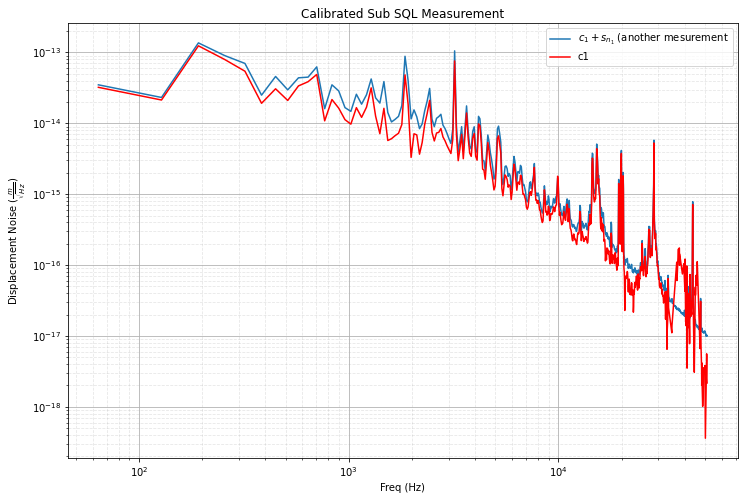

In [9]:
directory_path1 = '.\\Data8_16\\step2_1V5050\\'
print(directory_path1)
# if type(directory_path_dat1) is not type('String'):
#     raise ValueError('Input Path must be a String')
print(directory_path1+'FFT2.dat')
LFN_spectrum0 = np.loadtxt(directory_path1+'FFT2.dat')#s33half    
Coherence0 = np.loadtxt(directory_path1+'Coherence.dat')
FFT1_0 = np.loadtxt(directory_path1+'FFT1.dat')
#     V_L = np.loadtxt(directory_path+'V_LTime2.dat')
#     timeseries =np.loadtxt(directory_path+'ampTime2.dat')
#     shot_noise = np.loadtxt(directory_path+'FFT2.dat') 
#     cross_spectrom = np.loadtxt(directory_path+'Cross_Spectrum.dat')#s13

directory_path2 = '.\\Data8_16\\Step1_2V\\'
# if type(directory_path_dat2) is not type('String'):
#     raise ValueError('Input Path must be a String')
# print(directory_path2+'FFT2.dat')
LFN_spectrum = np.loadtxt(directory_path2+'FFT2.dat')#s33half
LFN_spectrum_old = LFN_spectrum
Coherence = np.loadtxt(directory_path2+'Coherence.dat')
FFT1 = np.loadtxt(directory_path2+'FFT1.dat')
V_L = np.loadtxt(directory_path2+'V_LTime2.dat')
timeseries =np.loadtxt(directory_path2+'ampTime2.dat')
shot_noise = np.loadtxt(directory_path2+'FFT2.dat') 
cross_spectrom = np.loadtxt(directory_path2+'Cross_Spectrum.dat')#s13
    
s33 = LFN_spectrum[1:,1]**2
s13 = cross_spectrom[1:,1]
s22 = FFT1[1:,1]**2
lamb = s33/s13
  
directory_path3 = '.\\Data8_16\\Step4_1V5050split\\'
s12load = np.loadtxt(directory_path3+'fft2_1V_5050splitCross_Spectrum.dat')
s11load = np.loadtxt(directory_path3+'fft2_1V_5050splitFFT1.dat')
s11 = s11load[1:,1]**2
s12 = s12load[1:,1]
f_vsqr = s13/lamb
c1sqr = s12-f_vsqr
c1 = np.sqrt(c1sqr)
sn1sqr = s11-s12
    
#Find average value of peaks to calculate max and min of LFN oscillations.
x = timeseries[:,0]
y = timeseries[:,1]
y_mins = y*-1 +50 #why are you adding 50

peaks_max, _1 = find_peaks(y, height=0)
peaks_min, _2 = find_peaks(y_mins, height=0)

min_x = x[peaks_min]
max_x = x[peaks_max]
min_array = y[peaks_min]
max_array = y[peaks_max]
    
#     plt.figure(4)
#     plt.plot(timeseries[:,0],timeseries[:,1])
#     plt.plot(min_x,min_array,'*')
#     plt.plot(max_x,max_array,'*')

ave_min_1 = np.median(min_array)#why use median

i_array = []
for i in np.arange(len(min_array)):
    if min_array[i] > ave_min_1*1.05:
        i_array.append(i)
    else:
        pass

min_array = np.delete(min_array,i_array)


ave_max_1 = np.median(max_array)

j_array = []
for i in np.arange(len(max_array)):
    if max_array[i] < ave_max_1*.95:
        j_array.append(i)
    else:
        pass

max_array = np.delete(max_array,j_array)

max_array_average = np.average(max_array)
min_array_average = np.average(min_array)
#     print('Max LFN_Amp:',max_array_average)
#     print('Min LFN_Amp:',min_array_average)
V_L_ave = np.average(V_L[:,1])

amp_final_4 = (max_array_average - min_array_average)/2.
offset = (max_array_average+min_array_average)/2.

del_phi = np.arccos((V_L_ave-offset)/amp_final_4)
print(del_phi)
tao = 2/4.0703e6 # (1/Hz) aka (s), this number comes from /home/qol/Google Drive/data/Torrey/Sub SQL Paper/Data/machzender_zeros_post_freespace_setup/

dvdw = amp_final_4*np.sin(del_phi)*tao
#print 'DV/DW:%.10f' %(dvdw) # V/Hz

C = Coherence[1:,1]
f = Coherence[1:,0]

# c1_again = f*(f_vsqr/(C*s22)-1)
cons1 = (f_vsqr/(C*s33)-1)

LFN_conversion = 0.01/(3e8/1064e-9) #L/(c/lambda) from Hz -> meters
R = LFN_conversion/ (2*np.pi)/dvdw #dvdw is V -> hz, LFN_Conversion is hz - meters.
print(R)
M = np.sqrt(c1sqr)*R*lamb
Mq = np.sqrt((1-C)/C)*c1*R
# M_again = c1_again*R

#     LFN_conversion = 0.01/(3e8/1064e-9) #L/(c/lambda) from Hz -> meters
LFN = LFN_spectrum_old[1:,1]*R #dvdw is V -> hz, LFN_Conversion is hz - meters.
M1 = LFN*np.sqrt((LFN**2/(C*LFN**2))-1)
c1sqr_old = ((1-C)/C)*LFN**2 #Old M, not accounting for shot noise on PDF
csqr_new = ((c1sqr_old/(1+sn1sqr/c1sqr)))
M_new = np.sqrt(csqr_new[csqr_new>=0])
f_new = f[csqr_new>=0]
# print(len(M_new))

M_old = np.sqrt(c1sqr_old)
const2 = np.sqrt((1-C)/C)

C0 = Coherence0[1:,1]
LFN0 = LFN_spectrum0[1:,1]
M_0 = np.sqrt((1-C0)/C0)*LFN0*R


#######################################################################################################################
# plt.figure(11)
# plt.loglog(f,s12,label='s12')
# plt.loglog(f,f_vsqr,label='F')
# plt.loglog(f,s13,label='s13')
# # plt.loglog(f,c1sqr,label='c1')
# plt.legend()

# plt.figure(10)
# plt.loglog(f,lamb,label='f')
# plt.legend()


# plt.figure(1)
# plt.loglog(FFT1_0[:,0],FFT1_0[:,1],label='step 1: 2V on PD_L')
# plt.loglog(FFT1[:,0],FFT1[:,1],label='step 2: 2V split PD_L and PD_1')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Displacement Noise v/(Hz)^(1/2)')
# plt.grid()
# plt.grid(True)
# plt.grid(which='minor',linestyle='--',alpha = 0.3)
# plt.legend()

# plt.figure(2)
# plt.loglog(f,M_0,label='step 1: S33_0((1-C0)/C0)')
# plt.loglog(f,M_old,label='step 2: S33((1-c)/C)')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Displacement Noise (m/sqrt(Hz))')
# plt.legend()

# plt.figure(3,figsize=(12,8))
# plt.grid()
# plt.grid(True)
# plt.minorticks_on()
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Displacement Noise ($\\frac{m}{\\sqrt{Hz}}$)')
# plt.grid(which='minor',linestyle='--',alpha = 0.3)
# plt.title('Calibrated Sub SQL Measurement')
# # plt.loglog(f,M_again,label = 'C_1.1')
# plt.loglog(f,cons1,label = 'const 1.1')
# plt.loglog(f,const2,label = 'const 1.2')

fig = plt.figure(4,figsize=(12,8))
axs = fig.add_subplot(111)
axs.loglog(f,M_old,label = '$c_1+s_{n_1}$ (another mesurement')
axs.loglog(f_new,M_new,color = 'r',label = 'c1')
plt.grid()
plt.grid(True)
plt.minorticks_on()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Displacement Noise ($\\frac{m}{\\sqrt{Hz}}$)')
plt.grid(which='minor',linestyle='--',alpha = 0.3)
plt.title('Calibrated Sub SQL Measurement')
# plt.loglog(f,M_again,label = 'C_1.1')

# plt.loglog(f_new,M_new,label = 'C2.1')
#     plt.loglog(f,s12,label = 's12')
#     plt.loglog(f,f_v,label='f')
#         plt.loglog(f,sql,'k',label = 'SQL')
#         plt.fill_between(f,M,sql,alpha=.5,color = [127./255.,224./255.,181./255.],where=M<sql)
# plt.xlim([1e4,1e5])
# plt.ylim(3e-18,4e-15)
plt.xlabel('Freq (Hz)')
plt.legend()
plt.savefig('noND_1V_Measure1.pdf')

# plt.figure(5)#,figsize=(16,12))
# #     plt.grid()
# #     plt.grid(True)
# plt.minorticks_on()
# plt.xlabel('Frequency (Hz)')
# plt.ylabel(Noise ('Displacement Noise ($\\frac{V}{\\sqrt{Hz}}$)')
# #     plt.grid(which='minor',linestyle='--',alpha = 0.3)
# #     plt.title('Calibrated Sub SQL Measurement')
# # print(len(f))
# # print(len(M))
# plt.loglog(f,M,label = 'Measurement')
# plt.loglog(f,M_new,label = 'new measurement')
# # print(len(f))
# # print(len(f_v))
# # plt.loglog(f,f_v,label='f')
# # plt.loglog(f,c1,label='c1')
# # plt.loglog(f,s12,label = 's12')
# # plt.loglog(f,sql,'k',label = 'SQL')
# # plt.fill_between(f,M,sql,alpha=.5,color = [127./255.,224./255.,181./255.],where=M<sql)
# #     plt.xlim([1e4,1e5])
# #     plt.ylim(3e-18,4e-15)
# plt.xlabel('Freq (Hz)')
# plt.legend()
matplotlib.colors.Colormap
# print(axs)

614
800
[3.22412491e-14 2.13470478e-14 1.24115526e-13 7.97142928e-14
 5.44173419e-14 1.91887803e-14 3.07179819e-14 2.10453437e-14
 3.37454103e-14 3.86563971e-14 4.89522483e-14 1.08461599e-14
 2.16796220e-14 1.63914321e-14 1.12716439e-14 9.74781538e-15
 1.66558409e-14 1.21530539e-14 1.69011304e-14 3.16577035e-14
 1.25992337e-14 7.15225760e-15 1.62991716e-14 5.72785347e-15
 6.07309263e-15 6.69702111e-15 7.24170989e-15 9.61118659e-15
 4.82419114e-14 1.86521453e-14 3.30911130e-15 7.12556988e-15
 6.87372335e-15 3.67212766e-15 5.34512638e-15 9.65799426e-15
 1.38551763e-14 2.10952017e-14 7.47754534e-15 5.64354556e-15
 7.31181993e-15 7.45908538e-15 8.44903680e-15 6.42185631e-15
 5.67275199e-15 4.84979063e-15 4.26378227e-15 3.75482222e-15
 5.97465352e-15 7.58868409e-14 6.93576169e-15 2.97321423e-15
 4.39366740e-15 6.99121053e-15 3.16881147e-15 6.74952841e-15
 1.40066933e-14 6.26734740e-15 3.80537397e-15 3.42014691e-15
 6.20322918e-15 7.20320713e-15 3.42563315e-15 3.02304330e-15
 9.82326897e-15 

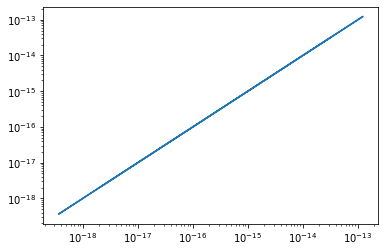

In [4]:
print(len(M_new))
print(len(f))
print(M_new)
plt.figure()
plt.loglog(M_new,M_new)

In [16]:
import matplotlib
matplotlib.colors.Colormap

matplotlib.colors.Colormap